# A 1D diffusion Model

Here we develop a one-dimensional model of difusion.
It assumes a constant diffusivity .
It uses a regular grid.
It has a step function for an initial condition.
It has fixed boundary conditions


Here is the diffusion equation:

$$ \frac{\partial C}{\partial t} = D\frac{\partial^2 C}{\partial x^2} $$

Here is the discretized version of the diffusion equation we will solve with our model

$$ C^{t+1}_x = C^t_x + {D \Delta t \over \Delta x^2} (C^t_{x+1} - 2C^t_x + C^t_{x-1}) $$

This is the FTCS scheme as described by Slingerland and Kump (2011)

We'll use two libraries, Numpy (for arrays) and Matplotlib (for plotting), that aren't a part of the core python distribution


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Start by setting two fixed model parameters, the diffusivity and the size of the model domain

In [3]:
D=100
Lx=300

Next, set up the model grid using NumPy array

In [4]:
dx=0.5
x=np.arange(start=0, stop=Lx, step=dx)
nx=len(x)

Set the initial conditions for the model.
The cake 'C' is a step functionwith a high value on the left, a low value on the right, and a step at the center of the domain.

In [5]:
C=np.zeros_like(x)
C_left=500
C_right=0
C[x<=Lx/2]=C_left
C[x>Lx/2]=C_right

Plot the initial profile

Text(0.5, 1.0, 'Initial Profile')

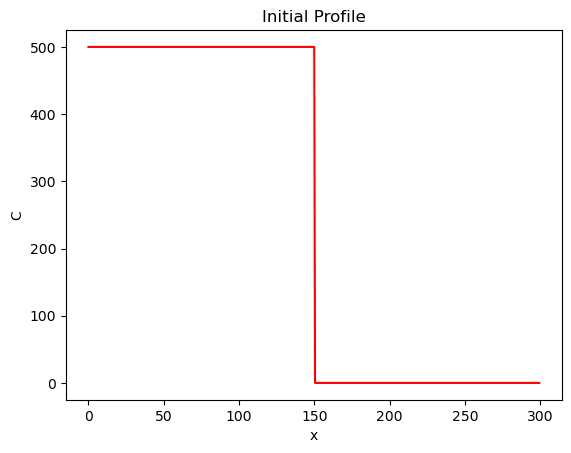

In [6]:
plt.figure()
plt.plot(x,C,"r")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Initial Profile")

Set the number of time steps in the model. Calculate a stable time step using a stability criterion.

In [7]:
nt=5000
dt=0.5*dx**2/D

Loop over the time steps of the model, solving the diffusion equation using the FTCS scheme shown above. Note the use of array operations on the variable C. The boundary conditions remain fixed in each time step.

In [8]:
for t in range(0,nt):
    C[1:-1] += D *dt / dx ** 2 * (C[:-2]-2*C[1:-1]+C[2:])

Plot the results

Text(0.5, 1.0, 'Final Profile')

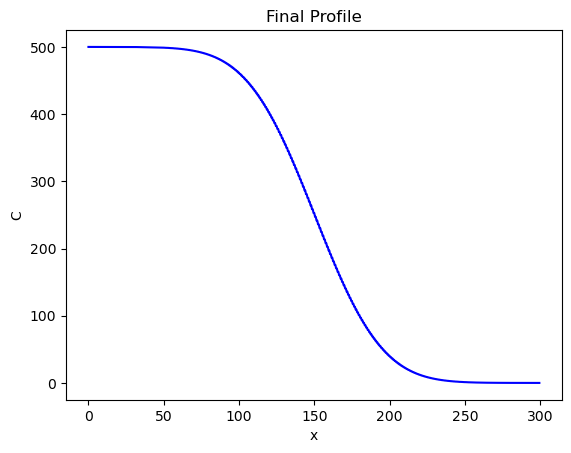

In [9]:
plt.figure()
plt.plot(x, C ,"b")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Final Profile")